<a href="https://colab.research.google.com/github/axelpuyo/liasd/blob/working/feature_map_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
clear all

In [168]:
## IMPORTS.
import os
import numpy as np
import pandas as pd
%matplotlib inline
from tensorflow import keras
from tensorflow.keras import layers

In [169]:
## MODEL PARAMETERS (STATIC).
n_dense1 = 1000
n_dense2 = 1000

In [170]:
## PREPROCESSING
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
if x_train.ndim < 4:
  x_train = np.expand_dims(x_train, -1)
  x_test = np.expand_dims(x_test, -1)

# Make sure train/test split is representative.
print(x_train.shape, "input shape")
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

values, counts = np.unique(y_train, return_counts = True)
print('----training----')
print('labels : counts')
print('---------------')
for i in range(len(values)):
    print(' ', values[i], '   : ', counts[i])

values, counts = np.unique(y_test, return_counts = True)
print('----testing----')
print('labels : counts')
print('---------------')
for i in range(len(values)):
    print(' ', values[i], '   : ', counts[i])

num_classes = len(counts)

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

(50000, 32, 32, 3) input shape
50000 train samples
10000 test samples
----training----
labels : counts
---------------
  0    :  5000
  1    :  5000
  2    :  5000
  3    :  5000
  4    :  5000
  5    :  5000
  6    :  5000
  7    :  5000
  8    :  5000
  9    :  5000
----testing----
labels : counts
---------------
  0    :  1000
  1    :  1000
  2    :  1000
  3    :  1000
  4    :  1000
  5    :  1000
  6    :  1000
  7    :  1000
  8    :  1000
  9    :  1000


In [171]:
## MODEL BUILD
model = keras.Sequential(
    [
        keras.Input(shape=x_train[0].shape),
        layers.Conv2D(5, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 30, 30, 5)         140       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 15, 15, 5)        0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 16)        736       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 6, 6, 16)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 576)               0         
                                                                 
 dense_11 (Dense)            (None, 10)              

In [172]:
## HYPER-PARAMETERS.
batch_size = 128
epochs = 15

In [173]:
## OPTIMIZER AND LOSS.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [174]:
## MODEL TRAINING.
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=True, callbacks=None, validation_split=0.8)

Epoch 1/15
79/79 [==============================] - 15s 189ms/step - loss: 2.2236 - accuracy: 0.1697 - val_loss: 2.0486 - val_accuracy: 0.2803
Epoch 2/15
79/79 [==============================] - 12s 157ms/step - loss: 1.9170 - accuracy: 0.3195 - val_loss: 1.8408 - val_accuracy: 0.3456
Epoch 3/15
79/79 [==============================] - 13s 160ms/step - loss: 1.7874 - accuracy: 0.3741 - val_loss: 1.7683 - val_accuracy: 0.3632
Epoch 4/15
79/79 [==============================] - 13s 160ms/step - loss: 1.7114 - accuracy: 0.3934 - val_loss: 1.7148 - val_accuracy: 0.3923
Epoch 5/15
79/79 [==============================] - 13s 165ms/step - loss: 1.6598 - accuracy: 0.4073 - val_loss: 1.6625 - val_accuracy: 0.4075
Epoch 6/15
79/79 [==============================] - 12s 157ms/step - loss: 1.6218 - accuracy: 0.4236 - val_loss: 1.6713 - val_accuracy: 0.4074
Epoch 7/15
79/79 [==============================] - 12s 157ms/step - loss: 1.5895 - accuracy: 0.4367 - val_loss: 1.6192 - val_accuracy: 0.4236

In [175]:
## SAVE TRAINED MODEL.
from google.colab import drive
drive.mount('/content/gdrive')
work_dir = f'/content/gdrive/My Drive/Colab Notebooks/Data'
model.save(work_dir)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/Data/assets


conv2d_21 (3, 3, 3, 5)


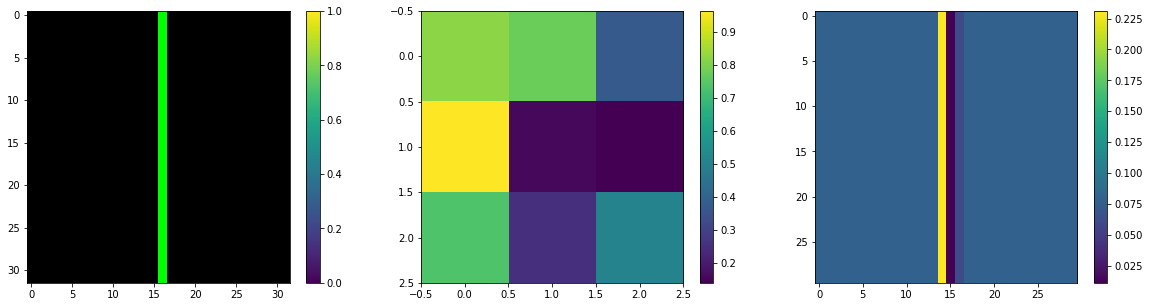

conv2d_22 (3, 3, 5, 16)


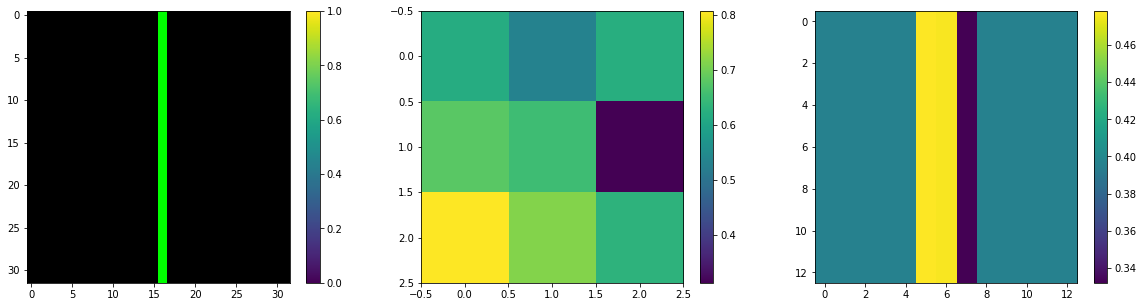

In [181]:
## FEATURE MAPS VISUALIZATION.
from keras.models import Model
# Construction of basic image, to see what happens to it at every stage of the model.
im = np.zeros(x_train[0].shape)
c = int(np.floor(x_train[0].shape[1] / 2))
im[:, c, 1] = 1 # Je lui donne une barre verte.
if im.ndim < 4:
  im = np.expand_dims(im, axis=0)

# plt.imshow(np.squeeze(im[..., -1]), cmap='gray', aspect='auto')
# plt.colorbar()
# plt.show()

for i in range(len(model.layers)):
  if 'conv' not in model.layers[i].name:
    continue
  model2 = Model(inputs=model.inputs, outputs=model.layers[i].output)

  kernels, biases = model.layers[i].get_weights()
  k_min, k_max = kernels.min(), kernels.max()
  kernels = (kernels - k_min) / (k_max - k_min)
  feature_map = model2.predict(im)

  f_map = np.squeeze(feature_map[..., 0])
  kernel = np.squeeze(kernels[..., 0, 0]) # Ce zéro est suspect, on ne sait pas si ce feature map vient forcément du 1er input du convolutional layer d'avant.

  print(model.layers[i].name, kernels.shape)
  plt.figure(figsize=(20,5))
  plt.subplot(131)
  plt.imshow(np.squeeze(im), aspect='auto')
  plt.colorbar()
  plt.subplot(132)
  plt.imshow(kernel, aspect='auto')
  plt.colorbar()
  plt.subplot(133)
  plt.imshow(f_map, aspect='auto')
  plt.colorbar()
  plt.show()
  ## Visualize all feature maps and corresponding filters.
  # num_maps = feature_map.shape[-1]
  # rows = int(np.floor(np.sqrt(num_maps)))
  
  # idx = 1
  # plt.figure(figsize=(16, 10))
  # print(model.layers[i].name, kernels.shape)
  # for j in range(num_maps):
  #   print(num_maps, idx, rows*2*rows)
  #   f_map = np.squeeze(feature_map[..., j])
  #   kernel = np.squeeze(kernels[..., 0, j]) # Ce zéro est suspect : revoir les shape des kernels.

  #   plt.subplot(rows, 2*rows, idx)
  #   plt.imshow(kernel, cmap='gray', aspect='auto')
  #   plt.colorbar()
  #   plt.subplot(rows, 2*rows, idx + 1)
  #   plt.imshow(f_map, cmap='gray', aspect='auto')
  #   plt.colorbar()

  #   idx += 1
  # plt.show()
  